# To run ONCE during session

In [1]:
## importing all libraries and dependencies
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import math
from heapq import merge
from random import *
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
all_SSwithin_bias = []
all_TTwithin_bias = []

all_SSacross_bias = []
all_STacross_bias = []
all_TSacross_bias = []
all_TTacross_bias = []

In [3]:
data_dir = '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/new_batch/Non_SONA_data/'
dir_ext = [f for f in listdir(data_dir)]
pt_dir_lst = []
for i in dir_ext:
    pt_dir = data_dir + i
    pt_dir_lst.append(pt_dir)

## Edit for each participant

In [5]:
pt_dir = pt_dir_lst[7]
pt_dir

'/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/new_batch/Non_SONA_data/emt_53'

In [6]:
encoding_files = []
tempdist_files = []
srcmem_files = []
for pt in pt_dir:
    pt_files = [f for f in listdir(pt_dir) if isfile(join(pt_dir, f))]

for a in pt_files:
    if a[-4:] == '.csv' and 'encoding' in a:
        encoding_files.append(pt_dir + '/' + a)
    if a[-4:] == '.csv' and 'temp_dist' in a:
        tempdist_files.append(pt_dir + '/' + a)
    if a[-4:] == '.csv' and 'src_mem' in a:
        srcmem_files.append(pt_dir + '/' + a)

In [7]:
#1 add in column for pt number and run number
#2 concat all the run csvs for each test
#3 drop NAs
len(pt_files)

48

In [8]:
tempdf = []
rn1 = tempdist_files[0]
dt1 = pd.DataFrame(pd.read_csv(rn1, header = 0))
dt1.columns = dt1.columns.str.replace(".", "_")
dt1['run_num'] = '1'
pt_num = dt1.participant[2]
type(dt1)
tempdf.append(dt1)
for b in tempdist_files[1:]:
    dt = pd.DataFrame(pd.read_csv(b, header = 0))
    dt.columns = dt.columns.str.replace(".", "_")
    dt['run_num'] = b[-32]
    tempdf.append(dt)
allTD_df = pd.concat(tempdf)
allTD_df = allTD_df.dropna(subset=['context_num', 'contexts_pics', 'objects_pics'])
pt_dt = 'C:/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/'
os.makedirs(pt_dt, exist_ok=True)  
allTD_df.to_csv(pt_dt+"%s_ptsummary.csv"%pt_num, index = True, header = True )

In [9]:
allTD_df

,context_num,context_type,context_shock,cntxt_trialnum,shock_object,us,shock_time,contexts_pics,condition,objects_pics,...,text_4_started,session,participant,date,expName,psychopyVersion,frameRate,Unnamed: 55,run_num,Unnamed: 51
3,8.0,SAFE,None,2.0,None,0.0,None,Scenes_selected/scene_073.jpg,within_safe1,new_obs/1_525.jpg,...,NaN,1.0,53.0,2023-05-10_15h40.20.257,temp_dist.py,2022.2.4,60.077307,NaN,1,NaN
4,14.0,THREAT,None,5.0,None,0.0,None,Scenes_selected/scene_075.jpg,across_threat1,new_obs/object_776.jpg,...,NaN,1.0,53.0,2023-05-10_15h40.20.257,temp_dist.py,2022.2.4,60.077307,NaN,1,NaN
5,16.0,SAFE,None,2.0,None,0.0,None,Scenes_selected/scene_032.jpg,within_safe1,new_obs/1_186.jpg,...,NaN,1.0,53.0,2023-05-10_15h40.20.257,temp_dist.py,2022.2.4,60.077307,NaN,1,NaN
6,5.0,THREAT,None,5.0,None,0.0,None,Scenes_selected/scene_038.jpg,across_threat1,new_obs/1_424.jpg,...,NaN,1.0,53.0,2023-05-10_15h40.20.257,temp_dist.py,2022.2.4,60.077307,NaN,1,NaN
7,1.0,SAFE,None,5.0,None,0.0,None,Scenes_selected/scene_097.jpeg,across_safe1,new_obs/1_575.jpg,...,NaN,1.0,53.0,2023-05-10_15h40.20.257,temp_dist.py,2022.2.4,60.077307,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,7.0,THREAT,None,5.0,None,0.0,None,Scenes_selected/scene_089.jpg,across_threat1,new_obs/1_384.jpg,...,NaN,1.0,53.0,2023-05-10_16h56.11.541,temp_dist5.py,2022.2.4,60.063848,NaN,5,NaN
33,9.0,THREAT,None,5.0,None,0.0,None,Scenes_selected/scene_029.jpg,across_threat1,new_obs/1_104.jpg,...,NaN,1.0,53.0,2023-05-10_16h56.11.541,temp_dist5.py,2022.2.4,60.063848,NaN,5,NaN
34,10.0,THREAT,None,2.0,None,0.0,None,Scenes_selected/scene_074.jpg,within_threat1,new_obs/1_143.jpg,...,NaN,1.0,53.0,2023-05-10_16h56.11.541,temp_dist5.py,2022.2.4,60.063848,NaN,5,NaN
35,1.0,SAFE,post,2.0,None,0.0,None,Scenes_selected/scene_085.jpg,within_safe1,new_obs/1_19.jpg,...,NaN,1.0,53.0,2023-05-10_16h56.11.541,temp_dist5.py,2022.2.4,60.063848,NaN,5,NaN


In [10]:
very_close = []
close = []
far = []
very_far = []

dt = pd.read_csv(pt_dt+"%s_ptsummary.csv"%pt_num)

In [11]:
dt.key_resp_keys

0      2.0
1      3.0
2      2.0
3      4.0
4      3.0
      ... 
170    2.0
171    2.0
172    1.0
173    2.0
174    3.0
Name: key_resp_keys, Length: 175, dtype: float64

In [12]:
shrt_df = pd.DataFrame({ 
                        'contxt1': dt.context_type,
                        'contxt2': dt.context_type2,
                        'context_shock':dt.context_shock,
                        'context_shock2':dt.context_shock2,
                        'cond1': dt.condition,
                        'cond2': dt.condition2,
                        'resp': dt.key_resp_keys,
                        'rt': dt.key_resp_rt})

In [13]:
within_TT = []
within_SS = []

across_TT = []
across_TS = []
across_ST = []
across_SS = []

rt_within_TT = []
rt_within_SS = []

rt_across_TT = []
rt_across_TS = []
rt_across_ST = []
rt_across_SS = []

for index, row in shrt_df.iterrows():
    resp_dt = shrt_df.resp
    resp_rt = shrt_df.rt
    if shrt_df.cond1[index] == 'within_threat1' and shrt_df.cond2[index] == 'within_threat2':
        within_TT.append(resp_dt[index])
        rt_within_TT.append(resp_rt[index])
        
    if shrt_df.cond1[index] == 'within_safe1' and shrt_df.cond2[index] == 'within_safe2':
        within_SS.append(resp_dt[index])
        rt_within_SS.append(resp_rt[index])
        
for index, row in shrt_df.iterrows():
    resp_dt = shrt_df.resp
    resp_rt = shrt_df.rt
    if shrt_df.cond1[index] == 'across_threat1' and shrt_df.cond2[index] == 'across_threat2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post':
        across_TT.append(resp_dt[index])
        rt_across_TT.append(resp_rt[index])
        
    if shrt_df.cond1[index] == 'across_threat1' and shrt_df.cond2[index] == 'across_safe2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post':
        across_TS.append(resp_dt[index])
        rt_across_TS.append(resp_rt[index])
        
    if shrt_df.cond1[index] == 'across_safe1' and shrt_df.cond2[index] == 'across_threat2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post':
        across_ST.append(resp_dt[index])
        rt_across_ST.append(resp_rt[index])
    
    if shrt_df.cond1[index] == 'across_safe1' and shrt_df.cond2[index] == 'across_safe2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post':
        across_SS.append(resp_dt[index])
        rt_across_SS.append(resp_rt[index])

In [14]:
SSwithin_close = []
SSwithin_far = []

TTwithin_close = []
TTwithin_far = []

for a in within_SS:
    if a == 1 or a == 2:
        SSwithin_close.append(a)
    if a == 3 or a == 4:
        SSwithin_far.append(a)
        
for a in within_TT:
    if a == 1 or a == 2:
        TTwithin_close.append(a)
    if a == 3 or a == 4:
        TTwithin_far.append(a)

In [15]:
SSacross_close = []
SSacross_far = []

STacross_close = []
STacross_far = []

TSacross_close = []
TSacross_far = []

TTacross_close = []
TTacross_far = []

for c in across_SS:
    if c == 1 or c == 2:
        SSacross_close.append(c)
    if c == 3 or c == 4:
        SSacross_far.append(c)
        
for c in across_TT:
    if c == 1 or c == 2:
        TTacross_close.append(c)
    if c == 3 or c == 4:
        TTacross_far.append(c)
        
for c in across_ST:
    if c == 1 or c == 2:
        STacross_close.append(c)
    if c == 3 or c == 4:
        STacross_far.append(c)
        
for c in across_TS:
    if c == 1 or c == 2:
        TSacross_close.append(c)
    if c == 3 or c == 4:
        TSacross_far.append(c)


In [16]:
SSwithin_bias = (len(SSwithin_close)-len(SSwithin_far))/(len(SSwithin_close)+len(SSwithin_far))
all_SSwithin_bias.append(SSwithin_bias)
TTwithin_bias = (len(TTwithin_close)-len(TTwithin_far))/(len(TTwithin_close)+len(TTwithin_far))
all_TTwithin_bias.append(TTwithin_bias)

SSacross_bias = (len(SSacross_close)-len(SSacross_far))/(len(SSacross_close)+len(SSacross_far))
all_SSacross_bias.append(SSacross_bias)
STacross_bias = (len(STacross_close)-len(STacross_far))/(len(STacross_close)+len(STacross_far))
all_STacross_bias.append(STacross_bias)
TSacross_bias = (len(TSacross_close)-len(TSacross_far))/(len(TSacross_close)+len(TSacross_far))
all_TSacross_bias.append(TSacross_bias)
TTacross_bias = (len(TTacross_close)-len(TTacross_far))/(len(TTacross_close)+len(TTacross_far))
all_TTacross_bias.append(TTacross_bias)

Text(0.5, 1.0, '53.0_Within context temporal bias')

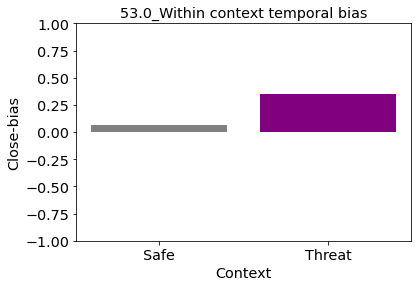

In [17]:
x = ['Safe', 'Threat']
y = [SSwithin_bias, TTwithin_bias]
plt.bar(x, y, width=0.8, bottom=None, color = ['grey', 'purple'], align='center', data=None)
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("Close-bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.title("%s_Within context temporal bias"%pt_num, fontsize = "x-large")

Text(0.5, 1.0, '53.0_Across context temporal bias')

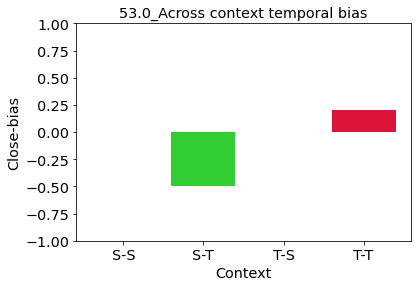

In [18]:
x = ['S-S', 'S-T', 'T-S', 'T-T']
y = [SSacross_bias, STacross_bias, TSacross_bias, TTacross_bias]
plt.bar(x, y, width=0.8, bottom=None, color = ['green', 'limegreen', 'gold','crimson'], align='center', data=None)
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("Close-bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.title("%s_Across context temporal bias"%pt_num, fontsize = "x-large")

Text(0.5, 1.0, 'All pts_Across context temporal bias')

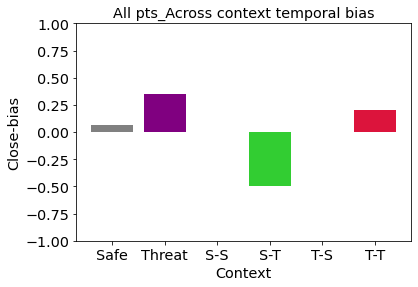

In [19]:
x = ['Safe', 'Threat','S-S', 'S-T', 'T-S', 'T-T']
y = [np.mean(all_SSwithin_bias), np.mean(all_TTwithin_bias), np.mean(all_SSacross_bias), np.mean(all_STacross_bias), np.mean(all_TSacross_bias), np.mean(all_TTacross_bias)]
plt.bar(x, y, width=0.8, bottom=None, color = ['grey', 'purple','green', 'limegreen', 'gold','crimson'], align='center', data=None)
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("Close-bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.title("All pts_Across context temporal bias", fontsize = "x-large")

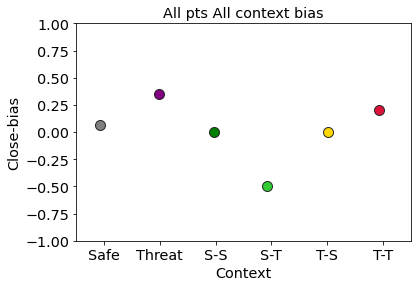

In [20]:
labels = ['Safe', 'Threat', 'S-S','S-T', 'T-S', 'T-T']
data = [all_SSwithin_bias, all_TTwithin_bias, all_SSacross_bias, all_STacross_bias, all_TSacross_bias, all_TTacross_bias]
colors = ['grey', 'purple','green', 'limegreen', 'gold','crimson']
sns.stripplot(data = data, s=10, linewidth=1, palette=colors)

plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(np.arange(6), labels, fontsize = "x-large")
plt.ylabel("Close-bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.title("All pts All context bias", fontsize = "x-large")
plt.show()

In [21]:
summarydf = pd.DataFrame({"Safe_within_bias":all_SSwithin_bias,
                          "Threat_within_bias":all_TTwithin_bias,
                         "SS_across_bias":all_SSacross_bias,
                         "ST_across_bias":all_STacross_bias,
                         "TS_across_bias":all_TSacross_bias,
                         "TT_across_bias":all_TTacross_bias})
summarydf.to_csv(pt_dt+"allsummary2_newbatch.csv", index = True, header = True )

In [22]:
summarydf

,Safe_within_bias,Threat_within_bias,SS_across_bias,ST_across_bias,TS_across_bias,TT_across_bias
0,0.06383,0.348837,0.0,-0.5,0.0,0.2


# predicted results

Text(0.5, 1.0, 'Predicted Temporal Bias')

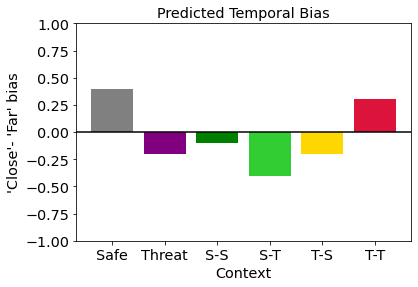

In [23]:
x = ['Safe', 'Threat','S-S', 'S-T', 'T-S', 'T-T']
y = [0.4, -0.2, -0.1, -0.4, -0.2, 0.3]
plt.bar(x, y, width=0.8, bottom=None, color = ['grey', 'purple','green', 'limegreen', 'gold','crimson'], align='center', data=None)
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("Predicted Temporal Bias", fontsize = "x-large")

# group results

In [24]:
res_csv = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/allsummary2.csv')

In [25]:
res_csv

,Unnamed: 0,Safe_within_bias,Threat_within_bias,SS_across_bias,ST_across_bias,TS_across_bias,TT_across_bias
0,0,0.565217,0.545455,-0.2,-0.4,-0.300000,-0.2
1,1,-0.130435,-0.181818,-0.2,-0.2,0.100000,0.0
2,2,0.288889,0.022222,0.3,0.2,-0.200000,-0.1
3,3,0.022222,0.200000,-0.7,-0.6,-0.300000,-0.5
4,4,-0.106383,0.318182,-0.3,-0.6,-0.333333,0.3
5,5,0.318182,0.347826,-0.6,-0.1,-0.700000,-0.1
6,6,0.090909,0.478261,-0.5,-0.1,-0.200000,-0.4
7,7,0.272727,0.260870,-0.1,0.2,0.300000,-0.1
8,8,-0.045455,-0.304348,-0.2,-0.6,-0.100000,0.0
9,9,-0.136364,-0.086957,0.1,-0.2,-0.300000,-0.3


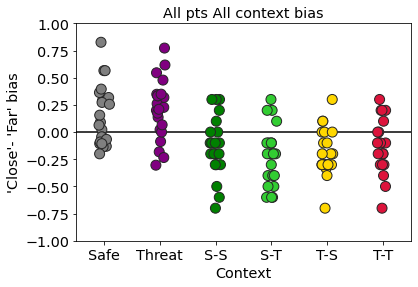

In [26]:
labels = ['Safe', 'Threat', 'S-S','S-T', 'T-S', 'T-T']
data = [res_csv.Safe_within_bias, res_csv.Threat_within_bias, res_csv.SS_across_bias, res_csv.ST_across_bias, res_csv.TS_across_bias, res_csv.TT_across_bias]
colors = ['grey', 'purple','green', 'limegreen', 'gold','crimson']
sns.stripplot(data = data, s=10, linewidth=1, palette=colors)

plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(np.arange(6), labels, fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All pts All context bias", fontsize = "x-large")
plt.show()

Text(0.5, 1.0, 'All participants (N = 22) temporal bias')

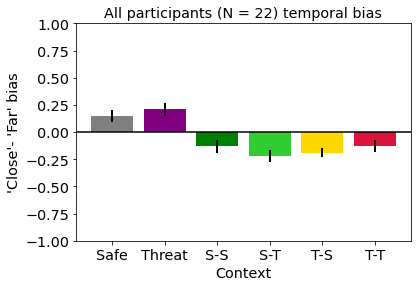

In [27]:
x = ['Safe', 'Threat','S-S', 'S-T', 'T-S', 'T-T']
y = [np.mean(res_csv.Safe_within_bias), np.mean(res_csv.Threat_within_bias), np.mean(res_csv.SS_across_bias), np.mean(res_csv.ST_across_bias), np.mean(res_csv.TS_across_bias), np.mean(res_csv.TT_across_bias)]
totalpts = len(res_csv)
sem = [stats.sem(res_csv.Safe_within_bias), stats.sem(res_csv.Threat_within_bias), stats.sem(res_csv.SS_across_bias), stats.sem(res_csv.ST_across_bias), stats.sem(res_csv.TS_across_bias), stats.sem(res_csv.TT_across_bias)]
plt.bar(x, y, width=0.8, bottom=None, color = ['grey', 'purple','green', 'limegreen', 'gold','crimson'], align='center', data=None, yerr = sem, error_kw=dict(elinewidth=2,ecolor='black'))
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) temporal bias"%totalpts, fontsize = "x-large")